In [1]:
%load_ext watermark
%watermark

2019-05-22T14:52:11+02:00

CPython 3.6.8
IPython 6.2.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


## Carga DataFrame

In [16]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
warnings.filterwarnings('ignore')

In [3]:
df_N_ES = pd.read_pickle('../Data/02.-Untitled.pkl')

df_N_ES.head()

,ds,y
0,2017-05-02,1993
1,2017-05-03,3193
2,2017-05-04,2759
3,2017-05-05,2503
4,2017-05-06,56


In [4]:
len(df_N_ES)

599

In [5]:
df_N_ES.tail()

,ds,y
594,2019-03-27,2217
595,2019-03-28,2252
596,2019-03-29,2008
597,2019-03-30,17
598,2019-04-01,10


### Vamos a evaluar el error para el mes Marzo del 2019

In [6]:
df_train = df_N_ES.iloc[:569]

df_test = df_N_ES.iloc[569:]

In [7]:
df_test.head()

,ds,y
569,2019-03-01,2128
570,2019-03-02,15
571,2019-03-03,1
572,2019-03-04,2209
573,2019-03-05,2123


In [8]:
len(df_test)

30

In [9]:
df_test.tail()

,ds,y
594,2019-03-27,2217
595,2019-03-28,2252
596,2019-03-29,2008
597,2019-03-30,17
598,2019-04-01,10


## Implementación de Prophet

In [10]:
f = Prophet()

f.add_country_holidays(country_name = 'ES')

f.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
df_forecast = f.make_future_dataframe(periods = 32) #Faltan 2 días en df_test, por ese motivo periods = 32.

df_forecast.head()

,ds
0,2017-05-02
1,2017-05-03
2,2017-05-04
3,2017-05-05
4,2017-05-06


In [12]:
df_forecast.tail()

,ds
596,2019-03-28
597,2019-03-29
598,2019-03-30
599,2019-03-31
600,2019-04-01


In [13]:
forecast = f.predict(df_forecast)

In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Asunción de la Virgen,Asunción de la Virgen_lower,Asunción de la Virgen_upper,Año nuevo,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
596,2019-03-28,1767.948412,1685.788497,3047.822495,1765.471433,1770.774756,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,639.539834,639.539834,639.539834,0.0,0.0,0.0,2407.488246
597,2019-03-29,1768.792033,1530.303129,2934.635694,1766.187956,1771.769734,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,464.650348,464.650348,464.650348,0.0,0.0,0.0,2233.442381
598,2019-03-30,1769.635655,-594.000560,797.573208,1766.793218,1772.889695,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1679.830076,-1679.830076,-1679.830076,0.0,0.0,0.0,89.805578
599,2019-03-31,1770.479276,-724.584715,707.780773,1767.433177,1773.920860,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1757.858956,-1757.858956,-1757.858956,0.0,0.0,0.0,12.620320
600,2019-04-01,1771.322897,1912.762371,3314.703057,1768.036897,1775.009030,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,839.899606,839.899606,839.899606,0.0,0.0,0.0,2611.222503


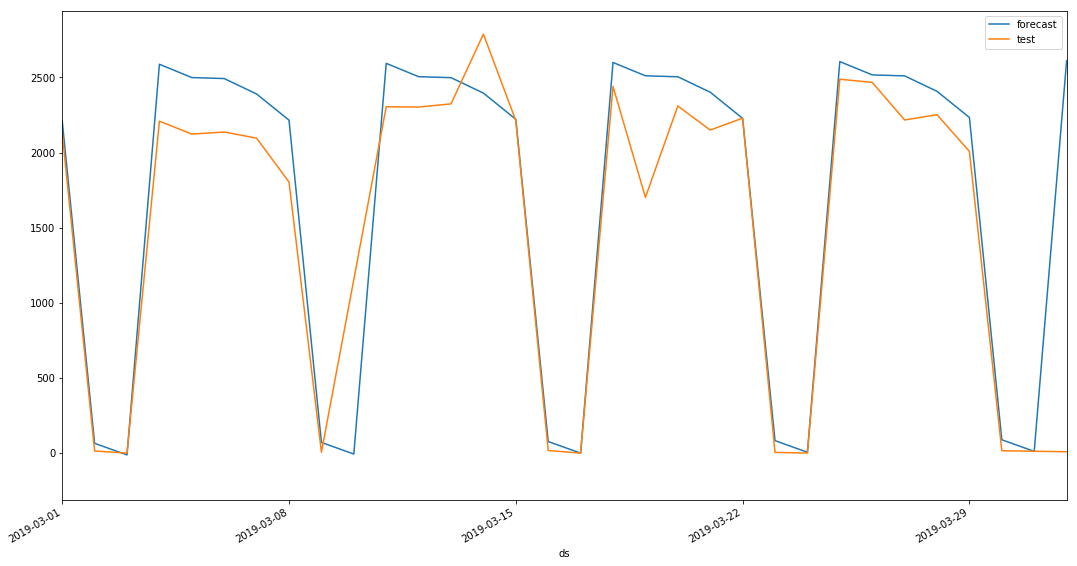

In [15]:
ax = forecast.plot(x = 'ds',y = 'yhat',label = 'forecast',legend = True,figsize=(18,10))

df_test.plot(x = 'ds',y = 'y',
             label = 'test',
             legend =True,
             ax = ax,
             xlim = (pd.Timestamp('2019-03-01'),pd.Timestamp('2019-04-01')));

## Medición del error 

In [19]:
predictions = forecast.iloc[-32:]['yhat']

predictions.head()

569    2209.820985
570      66.184182
571     -11.001076
572    2587.601107
573    2499.040939
Name: yhat, dtype: float64

In [20]:
df_test['y'].head()

569    2128
570      15
571       1
572    2209
573    2123
Name: y, dtype: int64

In [21]:
rmse(predictions,df_test['y'])

ValueError: operands could not be broadcast together with shapes (32,) (30,) 